# Import libraries 

In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
#conda install -c conda-forge mlxtend

### Association with book dataset

In [4]:
moviedata = pd.read_csv("D:/Work/Data Science and Analyst Course/ExcelR/Data Science/Assignments/9_Association rules/my_movies.csv")
moviedata.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [5]:
moviedata.shape

(10, 15)

# Pre-Processing
As the data is not in transaction formation 
We are using transaction Encoder

In [6]:
df=pd.get_dummies(moviedata)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# Apriori Algorithm 

### (Apriori Algorithm). Association rules with 20% Support and 70% confidence

In [22]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(Patriot, V3_Sixth Sense, Gladiator, Sixth Sen..."
77,0.4,"(V3_Sixth Sense, Gladiator, V1_Gladiator, Sixt..."
78,0.4,"(Patriot, V3_Sixth Sense, V1_Gladiator, Sixth ..."
79,0.4,"(Patriot, V3_Sixth Sense, Gladiator, V1_Gladia..."


In [23]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
649,(V3_Sixth Sense),"(Patriot, Gladiator, V1_Gladiator, Sixth Sense...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
650,(Gladiator),"(Patriot, V3_Sixth Sense, V1_Gladiator, Sixth ...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
651,(V1_Gladiator),"(Patriot, V3_Sixth Sense, Gladiator, Sixth Sen...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
652,(Sixth Sense),"(Patriot, V3_Sixth Sense, Gladiator, V1_Gladia...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [24]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
327,(V1_Sixth Sense),"(Sixth Sense, V4_Green Mile, Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
176,"(Green Mile, V4_Green Mile)",(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
40,(V4_Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
41,(V1_Sixth Sense),(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
86,"(Sixth Sense, Green Mile)",(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
87,"(Sixth Sense, V1_Sixth Sense)",(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
90,(Green Mile),"(Sixth Sense, V1_Sixth Sense)",0.2,0.2,0.2,1.0,5.0,0.16,inf
91,(V1_Sixth Sense),"(Sixth Sense, Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
92,"(Sixth Sense, V4_Green Mile)",(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
93,"(Sixth Sense, Green Mile)",(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf


In [25]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
...,...,...,...,...,...,...,...,...,...
649,(V3_Sixth Sense),"(Patriot, Gladiator, V1_Gladiator, Sixth Sense...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
650,(Gladiator),"(Patriot, V3_Sixth Sense, V1_Gladiator, Sixth ...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
651,(V1_Gladiator),"(Patriot, V3_Sixth Sense, Gladiator, Sixth Sen...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
652,(Sixth Sense),"(Patriot, V3_Sixth Sense, Gladiator, V1_Gladia...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


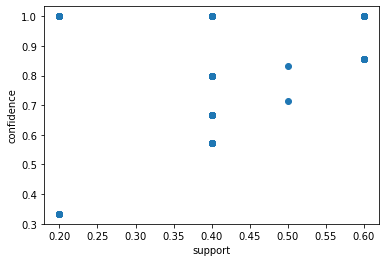

In [26]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

### (Apriori Algorithm). Association rules with 30% Support and 80% confidence

In [32]:
frequent_itemsets1 = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets1

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(Patriot, V3_Sixth Sense, Gladiator, Sixth Sen..."
59,0.4,"(V3_Sixth Sense, Gladiator, V1_Gladiator, Sixt..."
60,0.4,"(Patriot, V3_Sixth Sense, V1_Gladiator, Sixth ..."
61,0.4,"(Patriot, V3_Sixth Sense, Gladiator, V1_Gladia..."


In [33]:
rules = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(V3_Sixth Sense),"(Patriot, Gladiator, V1_Gladiator, Sixth Sense...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
598,(Gladiator),"(Patriot, V3_Sixth Sense, V1_Gladiator, Sixth ...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
599,(V1_Gladiator),"(Patriot, V3_Sixth Sense, Gladiator, Sixth Sen...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
600,(Sixth Sense),"(Patriot, V3_Sixth Sense, Gladiator, V1_Gladia...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [34]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
497,"(Patriot, Sixth Sense)","(V3_Sixth Sense, V1_Gladiator, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
414,"(Sixth Sense, V1_Gladiator)","(Patriot, Gladiator, V3_Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
425,"(Patriot, Gladiator, V3_Sixth Sense)","(Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
554,"(Patriot, Sixth Sense, Gladiator, V2_Patriot)","(V3_Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
423,"(Patriot, Sixth Sense, Gladiator, V2_Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
502,"(Sixth Sense, V1_Gladiator)","(Patriot, V2_Patriot, V3_Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
552,"(Patriot, Sixth Sense, Gladiator, V1_Gladiator)","(V3_Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf
416,(V3_Sixth Sense),"(Patriot, Sixth Sense, Gladiator, V1_Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
410,"(V3_Sixth Sense, V1_Gladiator)","(Patriot, Sixth Sense, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
428,"(Patriot, Sixth Sense, Gladiator)","(V3_Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf


In [35]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(V3_Sixth Sense),"(Patriot, Gladiator, V1_Gladiator, Sixth Sense...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
598,(Gladiator),"(Patriot, V3_Sixth Sense, V1_Gladiator, Sixth ...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
599,(V1_Gladiator),"(Patriot, V3_Sixth Sense, Gladiator, Sixth Sen...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
600,(Sixth Sense),"(Patriot, V3_Sixth Sense, Gladiator, V1_Gladia...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


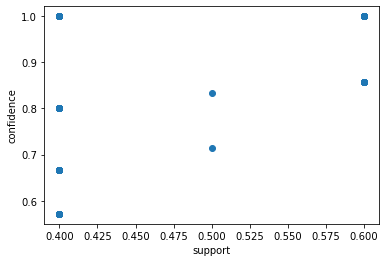

In [36]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

### (Apriori Algorithm). Association rules with 5% Support and 85% confidence

In [37]:
frequent_itemsets2 = apriori(df, min_support=0.05, use_colnames=True)
frequent_itemsets2

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V2_LOTR1, V5_LOTR2, Harry Potter1, LOTR1, Gre..."
1393,0.1,"(V2_LOTR1, V5_LOTR2, LOTR2, LOTR1, Green Mile,..."
1394,0.1,"(V2_LOTR1, V5_LOTR2, Harry Potter1, LOTR2, Gre..."
1395,0.1,"(V2_LOTR1, V5_LOTR2, Harry Potter1, LOTR2, LOT..."


In [38]:
rules = association_rules(frequent_itemsets2, metric="lift", min_threshold=0.85)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
64211,(Green Mile),"(V2_LOTR1, V5_LOTR2, Harry Potter1, LOTR2, LOT...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64212,(V4_Green Mile),"(V2_LOTR1, V5_LOTR2, Harry Potter1, LOTR2, LOT...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64213,(V3_Harry Potter1),"(V2_LOTR1, V5_LOTR2, Harry Potter1, LOTR2, LOT...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64214,(Sixth Sense),"(V2_LOTR1, V5_LOTR2, Harry Potter1, LOTR2, LOT...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


In [39]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32108,"(Sixth Sense, Green Mile, LOTR1, V3_Harry Pott...","(LOTR2, V5_LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
52635,"(LOTR2, Sixth Sense, V5_LOTR2, LOTR1)","(Green Mile, V4_Green Mile, V2_LOTR1, V1_Sixth...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33414,"(Sixth Sense, V5_LOTR2)","(V2_LOTR1, Harry Potter1, LOTR2, LOTR1, V4_Gre...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(LOTR2, Harry Potter1)","(V5_LOTR2, V2_LOTR1, LOTR1, V4_Green Mile, Six...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33416,"(LOTR1, Harry Potter1)","(V5_LOTR2, V2_LOTR1, LOTR2, V4_Green Mile, Six...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33417,"(V4_Green Mile, Harry Potter1)","(V5_LOTR2, V2_LOTR1, LOTR2, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33418,"(Sixth Sense, Harry Potter1)","(V5_LOTR2, V2_LOTR1, LOTR2, LOTR1, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
52645,"(LOTR1, Green Mile, V5_LOTR2, V1_Sixth Sense)","(LOTR2, Sixth Sense, V4_Green Mile, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33420,"(LOTR2, V4_Green Mile)","(V5_LOTR2, V2_LOTR1, Harry Potter1, LOTR1, Six...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33421,"(LOTR2, Sixth Sense)","(V5_LOTR2, V2_LOTR1, Harry Potter1, LOTR1, V4_...",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [40]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
4,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
64211,(Green Mile),"(V2_LOTR1, V5_LOTR2, Harry Potter1, LOTR2, LOT...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64212,(V4_Green Mile),"(V2_LOTR1, V5_LOTR2, Harry Potter1, LOTR2, LOT...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64213,(V3_Harry Potter1),"(V2_LOTR1, V5_LOTR2, Harry Potter1, LOTR2, LOT...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64214,(Sixth Sense),"(V2_LOTR1, V5_LOTR2, Harry Potter1, LOTR2, LOT...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


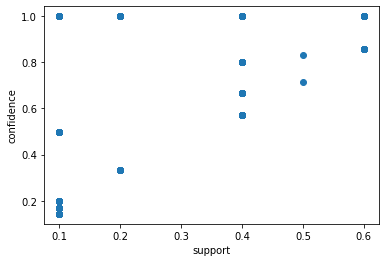

In [41]:
# visualization of obtained rule
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()